In [2]:
library(plyr)
library(ggplot2)
load('non_splitting.Rdata')

In [3]:
Stein_vol = ddply(summary_volume_stein_single, .(b, s, lam1Type, method, design), summarise, 
                         r = mean(exp(logVol / 100)), coverage = mean(coverage), hsigma = mean(hsigma))

dataset1 = Stein_vol
dataset1$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset1$method = factor(dataset1$method, levels = c('two-step stein'))
dataset1$design = factor(dataset1$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset1$lam1Type = factor(dataset1$lam1Type, levels = c('val', 'cv', '1se'))


In [4]:
theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom')

# Comparsion of two-step Stein against adaptive and oracle

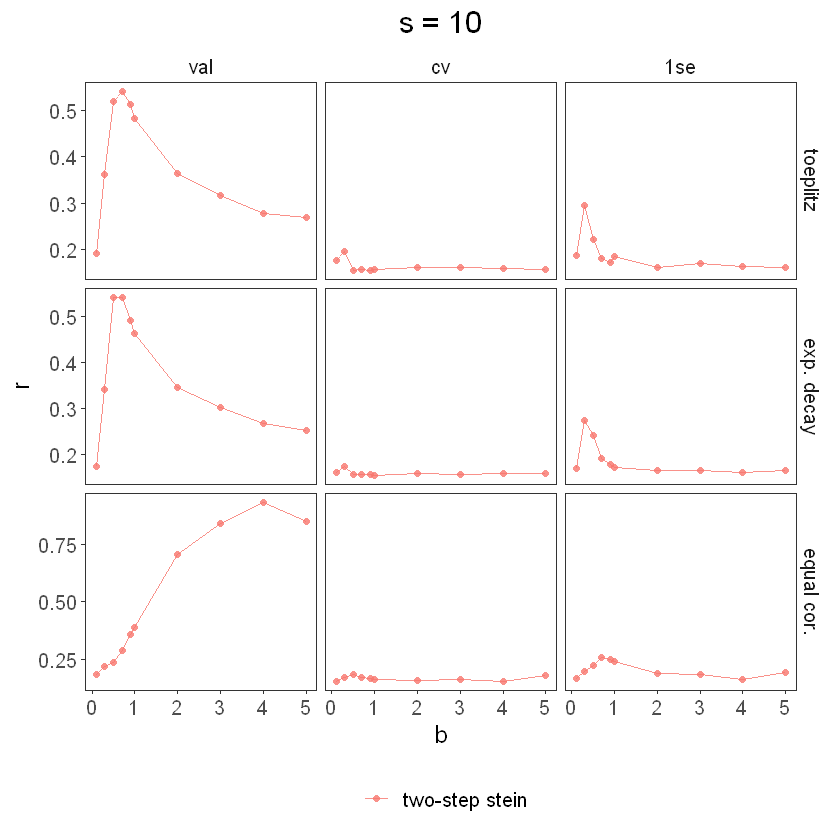

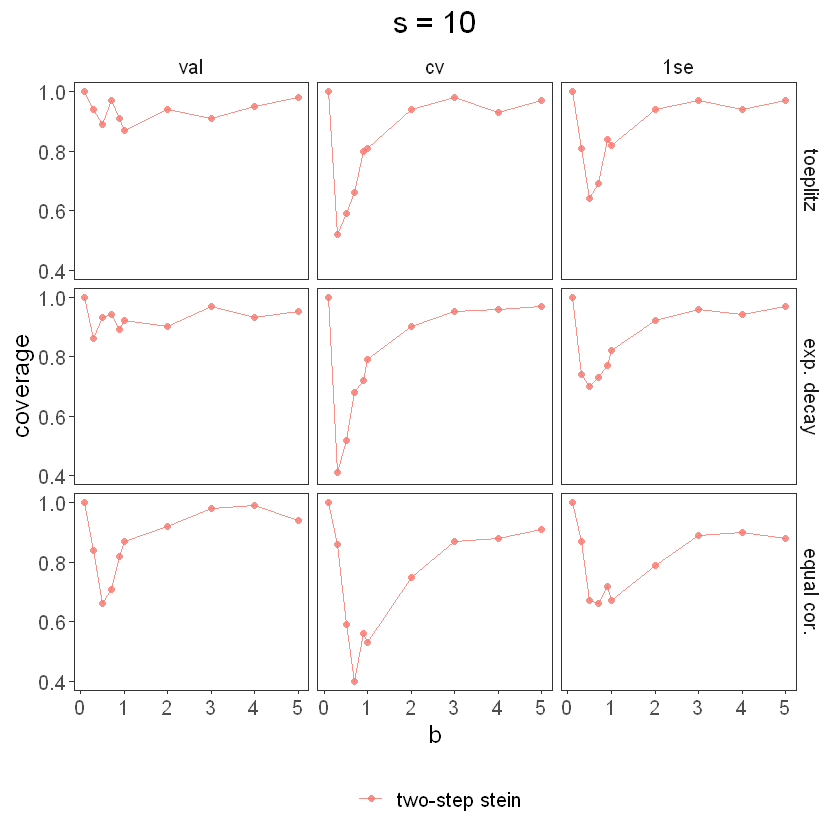

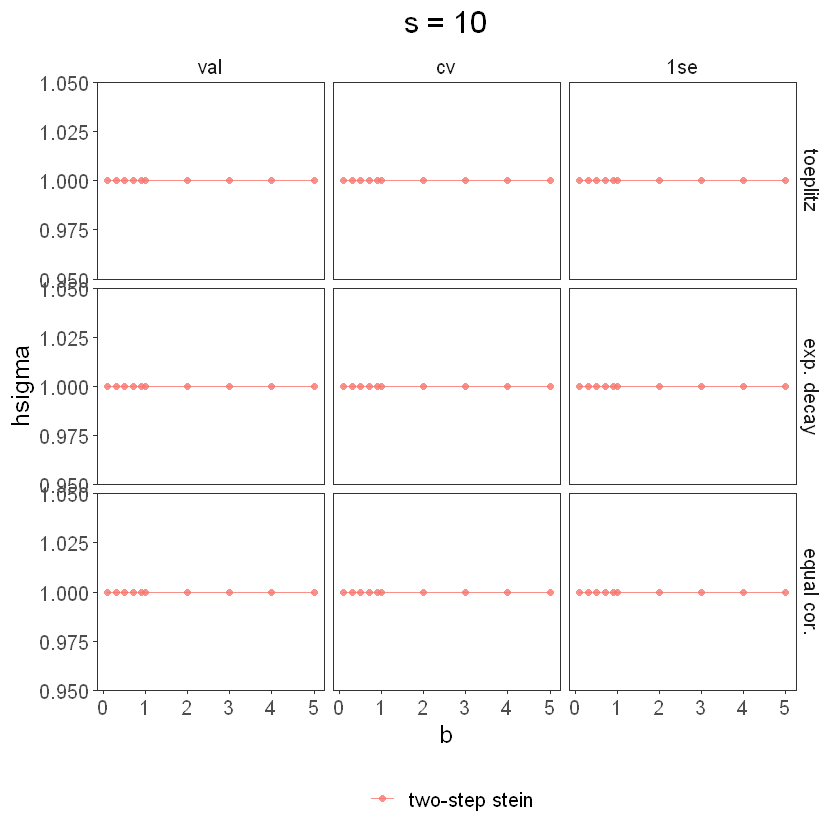

In [6]:
# ggplot(data = dataset1[dataset1$s == 5, ], aes(x = b, y = r, color = method, shape = method)) + 
#   geom_line(size = 0.5, alpha = 0.8) +
#   geom_point(size = 1.5, alpha = 0.8) +
#   scale_color_discrete(name = element_blank()) +
#   scale_shape_discrete(name = element_blank()) +
#   facet_grid(design ~ lam1Type, scales="free_y") + 
#   ggtitle("s = 5") + 
#   theme_settings
# ggplot(data = dataset1[dataset1$s == 5, ], aes(x = b, y = coverage, color = method, shape = method)) + 
#   geom_line(size = 0.5, alpha = 0.8) +
#   geom_point(size = 1.5, alpha = 0.8) +
#   scale_color_discrete(name = element_blank()) +
#   scale_shape_discrete(name = element_blank()) +
#   facet_grid(design ~ lam1Type, scales="fixed") + 
#   ggtitle("s = 5") + 
#   theme_settings

ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 10") + 
  theme_settings
  
# ggsave('stein_r.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 10") + 
  theme_settings
# ggsave('non_splitting_coverage.pdf', width = 6.67, height = 6.67, units = 'in')


ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = hsigma, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 10") + 
  theme_settings
# ggsave('hsigma.pdf', width = 6.67, height = 6.67, units = 'in')

# Comparison of two-step methods

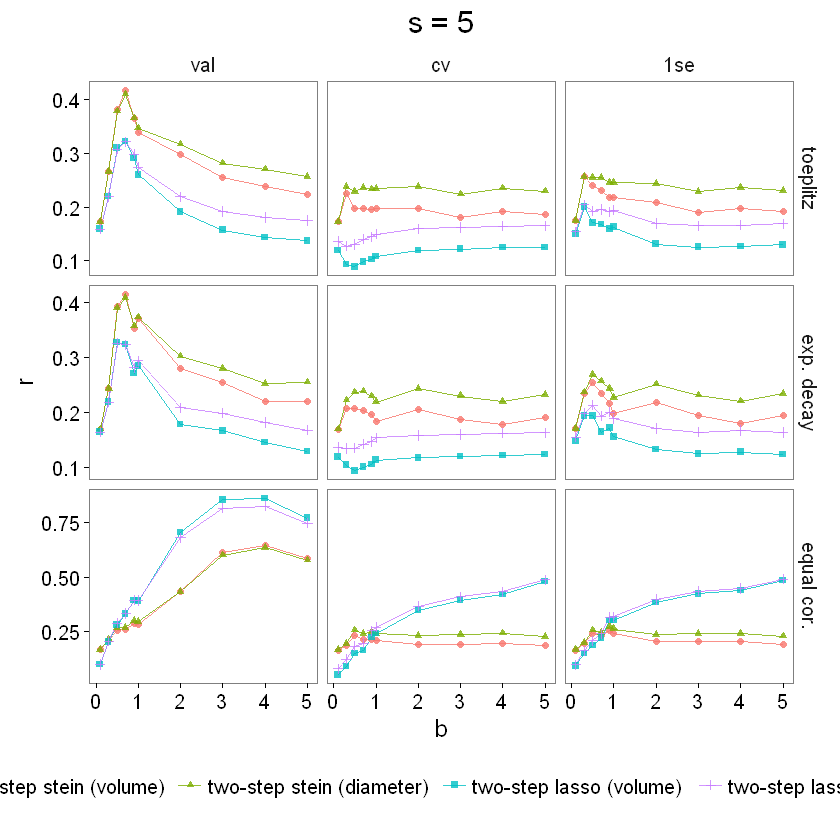

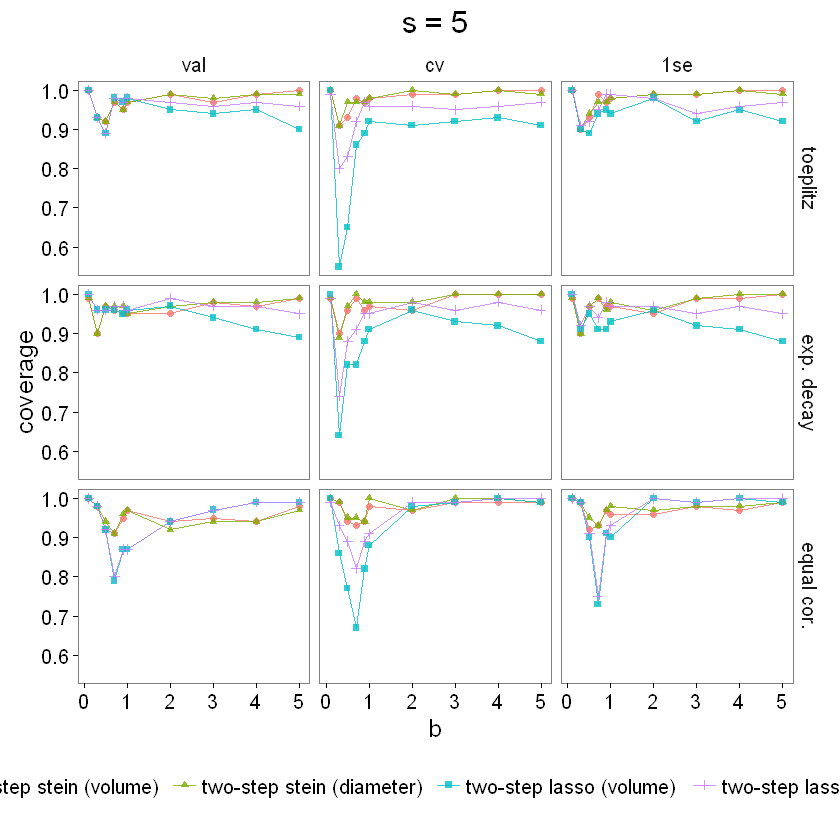

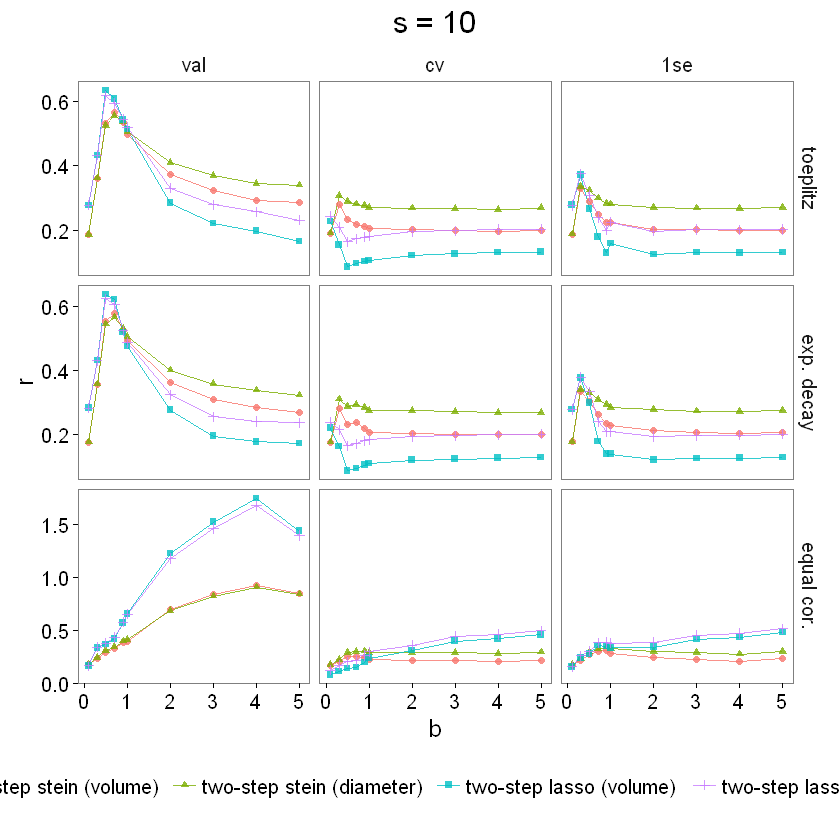

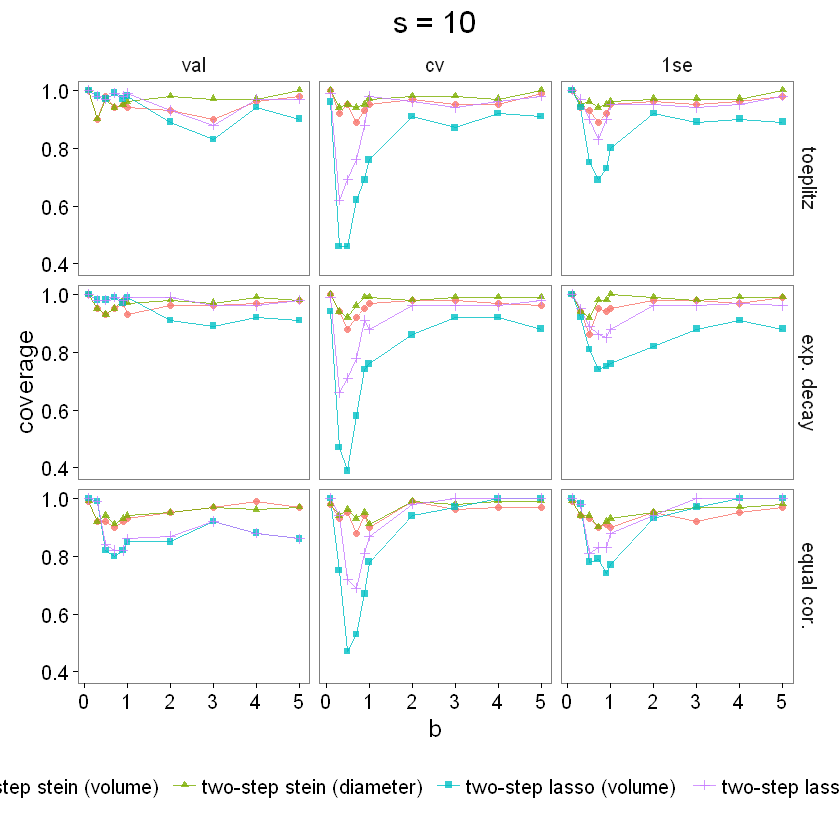

In [8]:
ggplot(data = dataset2[dataset2$s == 5, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 5") + 
  theme_settings
#ggsave('lasso_radis.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset2[dataset2$s == 5, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 5") + 
  theme_settings

ggplot(data = dataset2[dataset2$s == 10, ], aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle("s = 10") + 
  theme_settings

#ggsave('lasso_r.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset2[dataset2$s == 10, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 10") + 
  theme_settings
#ggsave('lasso_coverage.pdf', width = 6.67, height = 6.67, units = 'in')

In [9]:
adaptive_m = ddply(summary_adaptive_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
oracle_m = ddply(summary_oracle_multiple_version2, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol_m = ddply(summary_volume_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Stein_radius_m = ddply(summary_radius_stein_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_vol_m = ddply(summary_volume_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))
Lasso_radius_m = ddply(summary_radius_lasso_multiple, .(bs, bw, lam1Type, method, design), summarise, 
              r = mean(exp(logVol / 100)), coverage = mean(coverage))

dataset3 = rbind(adaptive_m, oracle_m, Stein_vol_m)
dataset3$method[dataset3$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset3$method = factor(dataset3$method, levels = c('adaptive', 'oracle', 'two-step stein'))
dataset3$design = factor(dataset3$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset3$lam1Type = factor(dataset3$lam1Type, levels = c('val', 'cv', '1se'))

Stein_vol_m['c'] = 'vol'
Stein_radius_m['c'] = 'radius'
Lasso_vol_m['c'] = 'vol'
Lasso_radius_m['c'] = 'radius'

dataset4 = rbind(Stein_vol_m, Stein_radius_m, Lasso_vol_m, Lasso_radius_m)
dataset4$method[dataset4$method == 'twoStepSteinVolume'] = 'two-step stein (volume)'
dataset4$method[dataset4$method == 'twoStepSteinRadius'] = 'two-step stein (diameter)'
dataset4$method[dataset4$method == 'twoStepLassoVolume'] = 'two-step lasso (volume)'
dataset4$method[dataset4$method == 'twoStepLassoRadius'] = 'two-step lasso (diameter)'
dataset4$method = factor(dataset4$method, levels = c('two-step stein (volume)', 'two-step stein (diameter)', 
                                                     'two-step lasso (volume)', 'two-step lasso (diameter)'))
dataset4$design = factor(dataset4$design, levels = c('toeplitz','exp. decay', 'equal cor.'))
dataset4$lam1Type = factor(dataset4$lam1Type, levels = c('val', 'cv', '1se'))

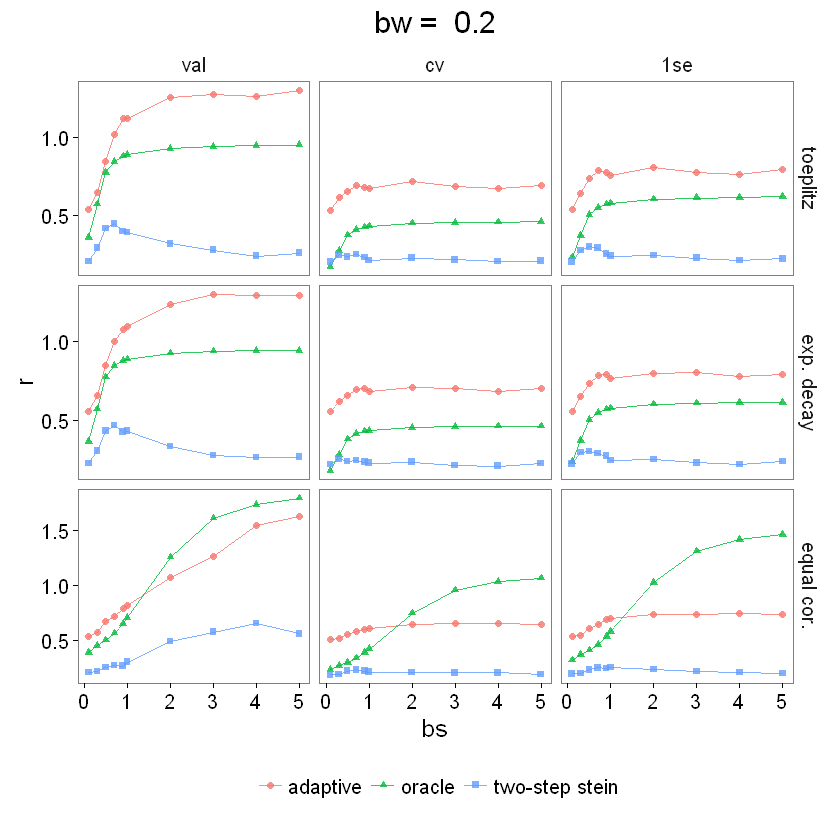

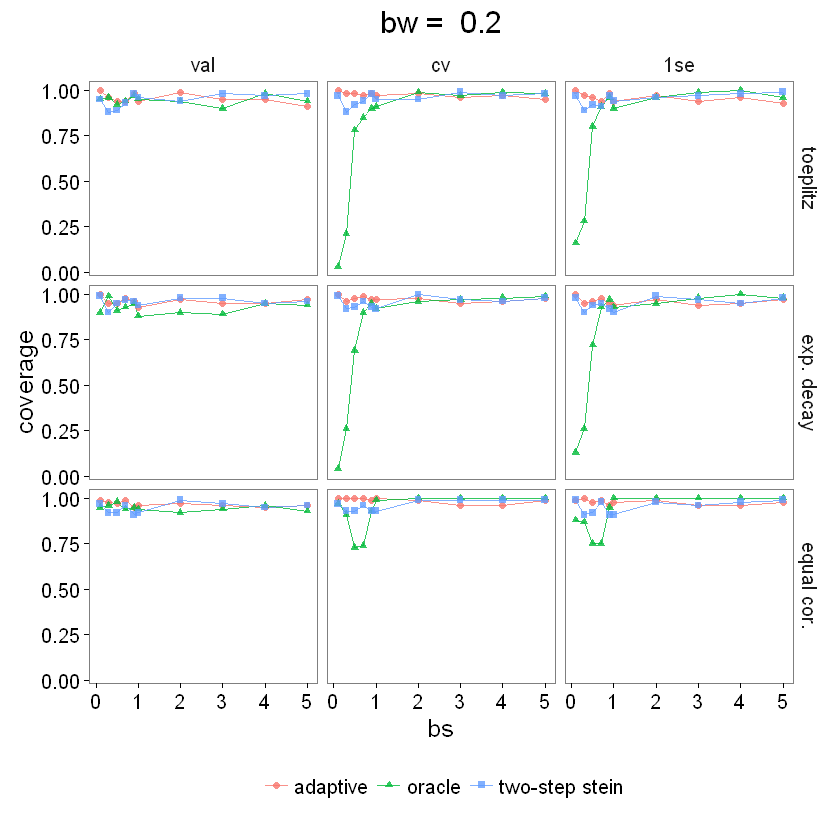

In [10]:
bw = 0.2
ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings
#ggsave('stein_r2.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset3[dataset3$bw == bw, ], aes(x = bs, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings 
#ggsave('stein_coverage2.pdf', width = 6.67, height = 6.67, units = 'in')

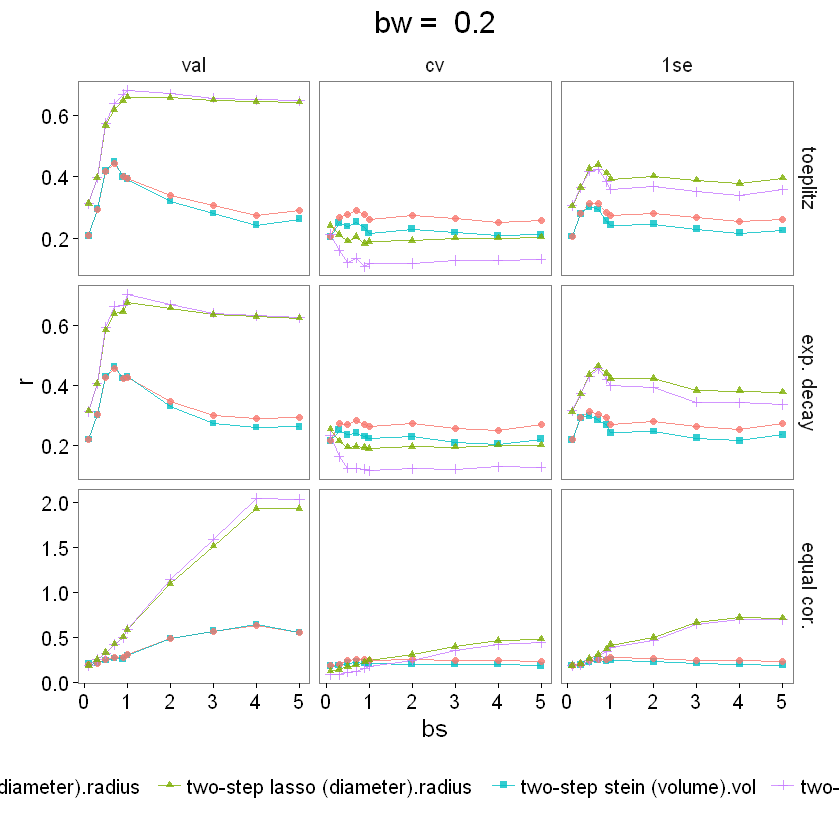

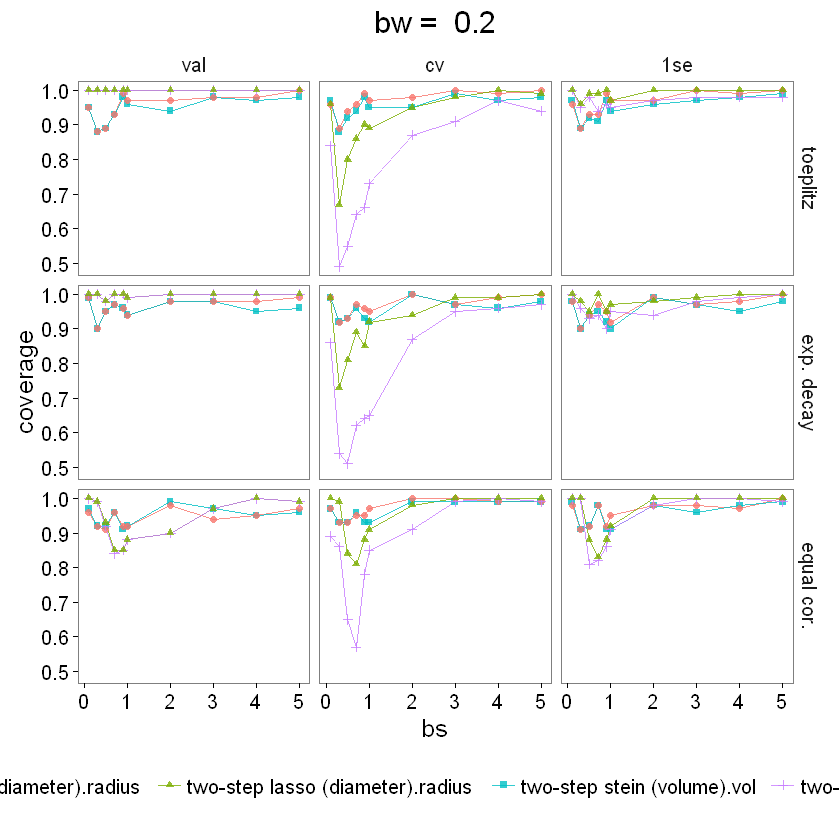

In [11]:
bw = 0.2
ggplot(data = dataset4[dataset3$bw == bw, ], aes(x = bs, y = r, color = interaction(method, c), shape = interaction(method, c))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="free_y") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings
#ggsave('stein_radis2.pdf', width = 6.67, height = 6.67, units = 'in')

ggplot(data = dataset4[dataset3$bw == bw, ], aes(x = bs, y = coverage, color = interaction(method, c), shape = interaction(method, c))) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle(paste("bw = ", bw)) + 
  theme_settings 
#ggsave('stein_coverage2.pdf', width = 6.67, height = 6.67, units = 'in')

# boxplot

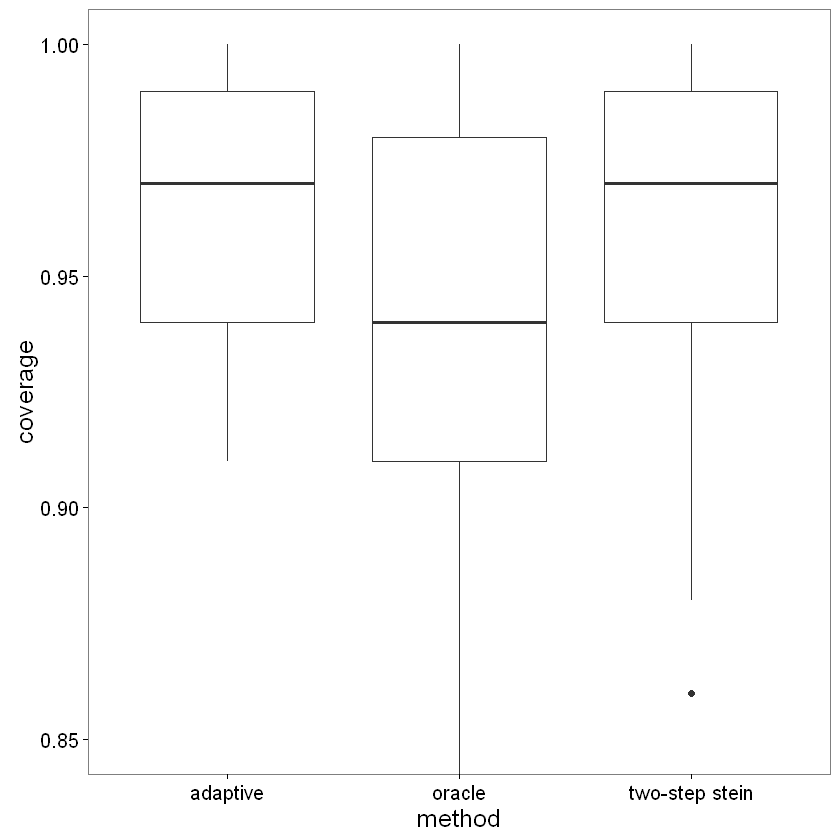

In [15]:
ggplot(data = dataset1, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  coord_cartesian(ylim = c(0.85, 1)) + 
  theme_settings
ggsave('coverage2.pdf', width = 6.67, height = 3.8, units = 'in')

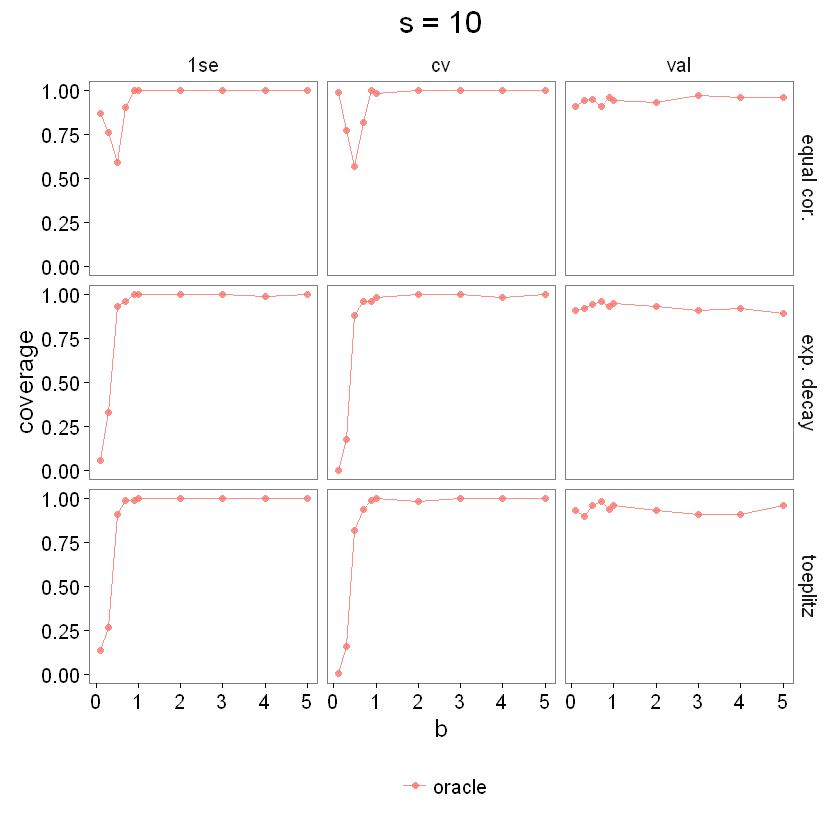

In [9]:
ggplot(data = oracle[oracle$s == 10, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 1.5, alpha = 0.8) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(design ~ lam1Type, scales="fixed") + 
  ggtitle("s = 10") + 
  theme_settings
ggsave('oracle_coverage.pdf', width = 6.67, height = 6.67, units = 'in')